**Evaluating the machine Learning Models**

In [58]:
#import required packages

import json
import pickle
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('~/finalproject/LHL-finalproject/preprocessed_data/dataencoded.csv')

In [60]:
# Assuming you want to drop the 'final_result' column
X = df.drop(columns=['final_result'])
y = df['final_result']

# Rest of your code for train-test split and model training
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, train_size=0.75)


function that reads the saved models

In [61]:
import pickle

def load_model(filename):
    """
    Load a machine learning model from a pickle file.
    
    Parameters:
        filename (str): Path to the pickle file containing the saved model.
        
    Returns:
        model: The loaded machine learning model.
    """
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model


Use learning curve to visualize the accuracy of decision tree model accross varying training set sizes 

In [62]:
#Function to plot accuracy
import matplotlib.pyplot as plt
def plot_accuracy(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_Train, y_Train, n_jobs=-1,
                                                            train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim(0.0, 1.1)
    plt.title("Accuracy Plot")
    plt.xlabel("Training set size")
    plt.ylabel("Accuracy %")

    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, 'bo-', color="r", label="Test Score")

**Decision tree Model**

/var/folders/5q/zftjlh_13zv18kdqjrvzmxq40000gn/T/ipykernel_9988/2148906406.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(train_sizes, test_mean, 'bo-', color="r", label="Test Score")


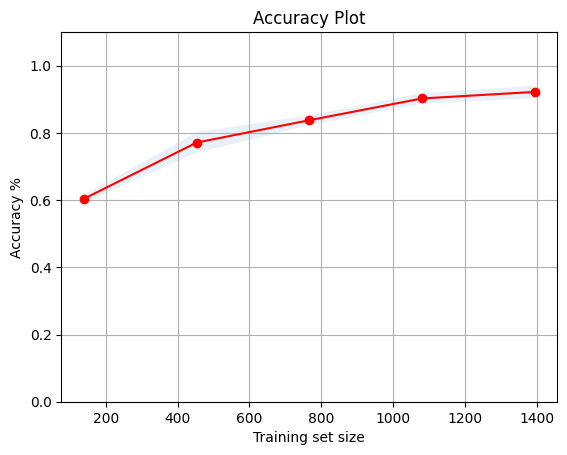

In [63]:
from sklearn.model_selection import learning_curve
dt = load_model('decision_tree_model.pkl')
plt = plot_accuracy(dt)

plot a normalized confusion matrix for evaluating the performance of the decision tree classifier

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

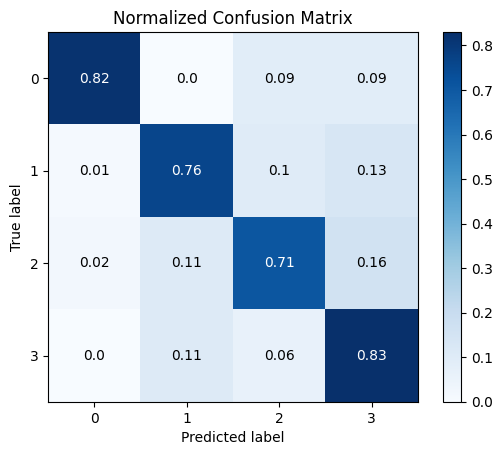

In [64]:
y_pred = cross_val_predict(dt, X_Test, y_Test)
skplt.metrics.plot_confusion_matrix(y_Test, y_pred, normalize=True)

**Random Forest**

/var/folders/5q/zftjlh_13zv18kdqjrvzmxq40000gn/T/ipykernel_9988/2148906406.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(train_sizes, test_mean, 'bo-', color="r", label="Test Score")


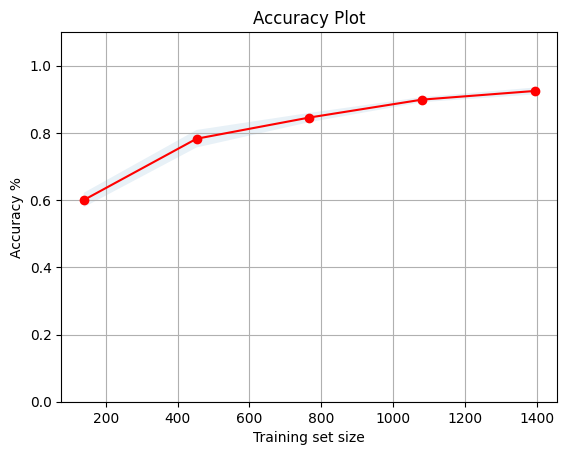

In [66]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
rf = load_model('random_forest_model.pkl')
plt = plot_accuracy(rf)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

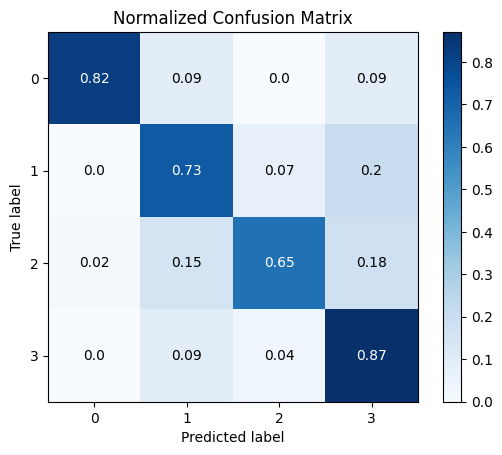

In [67]:
y_pred = cross_val_predict(rf, X_Test, y_Test)
skplt.metrics.plot_confusion_matrix(y_Test, y_pred, normalize=True)

**Gradient Boosting**

/var/folders/5q/zftjlh_13zv18kdqjrvzmxq40000gn/T/ipykernel_9988/2148906406.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(train_sizes, test_mean, 'bo-', color="r", label="Test Score")


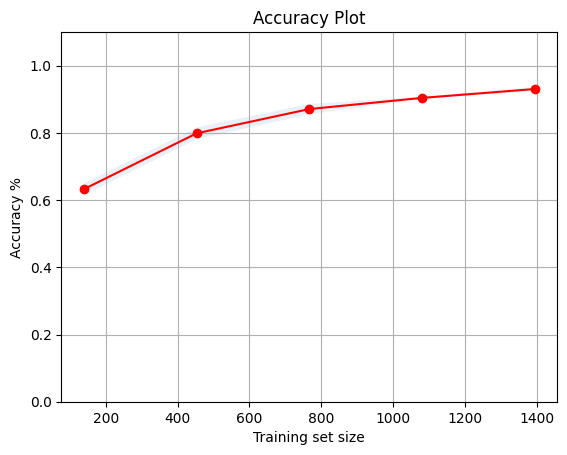

In [68]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
gb = load_model('gradient_boosting_model.pkl')
plt = plot_accuracy(gb)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

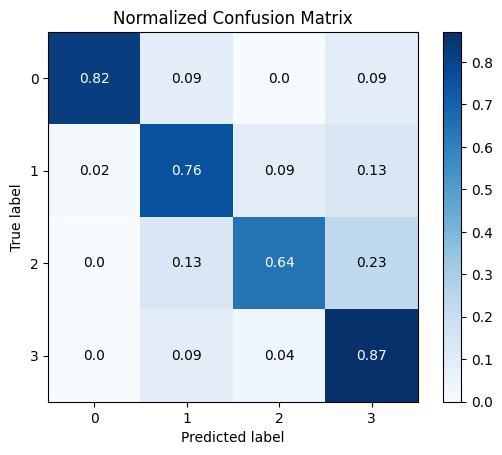

In [69]:
y_pred = cross_val_predict(gb, X_Test, y_Test)
skplt.metrics.plot_confusion_matrix(y_Test, y_pred, normalize=True)